In [119]:
#probability calculation
import random
win1 = [] #by switching
win2 = [] #by staying
for N in range(1, 1000):
    prize = random.randrange(1, 4, 1)
    first_attempt = random.randrange(1, 4, 1)
    if prize == 1:
        if first_attempt == 2:
            eliminate = 3
            second_attempt = random.randrange(1, 3, 1)
            if second_attempt != first_attempt:
                win1.append(N)
        elif first_attempt == 3:
            eliminate = 2
            second_attempt = random.randrange(1, 4, 2)
            if second_attempt != first_attempt:
                win1.append(N)
        elif first_attempt == 1:
            eliminate = random.randrange(2,4,1)
            if eliminate == 2:
                second_attempt = random.randrange(1, 4, 2)
                if second_attempt == first_attempt:
                        win2.append(N)
            elif eliminate == 3:
                second_attempt = random.randrange(1, 3, 1)
                if second_attempt == first_attempt:
                        win2.append(N)
    if prize == 2:
        if first_attempt == 1:
            eliminate = 3
            second_attempt = random.randrange(1, 3, 1)
            if second_attempt != first_attempt:
                win1.append(N)
        elif first_attempt == 3:
            eliminate = 1
            second_attempt = random.randrange(2, 4, 1)
            if second_attempt != first_attempt:
                win1.append(N)
        elif first_attempt == 2:
            eliminate = random.randrange(1,4,2)
            if eliminate == 1:
                second_attempt = random.randrange(2, 4, 1)
                if second_attempt == first_attempt:
                        win2.append(N)
            elif eliminate == 3:
                second_attempt = random.randrange(1, 3, 1)
                if second_attempt == first_attempt:
                        win2.append(N)
                
    if prize == 3:
        if first_attempt == 1:
            eliminate = 2
            second_attempt = random.randrange(1, 4, 2)
            if second_attempt != first_attempt:
                win1.append(N)
        elif first_attempt == 2:
            eliminate = 1
            second_attempt = random.randrange(2, 4, 1)
            if second_attempt != first_attempt:
                win1.append(N)
        elif first_attempt == 3:
            eliminate = random.randrange(1,3,1)
            if eliminate == 1:
                second_attempt = random.randrange(2, 4, 1)
                if second_attempt == first_attempt:
                        win2.append(N)
            elif eliminate == 2:
                second_attempt = random.randrange(1, 4, 2)
                if second_attempt == first_attempt:
                        win2.append(N)
print("The probability to win by switching: ",round(len(win1)/(len(win1)+len(win2)),2))
print("The probability to win by staying: ",round(len(win2)/(len(win1)+len(win2)),2))

The probability to win by switching:  0.68
The probability to win by staying:  0.32


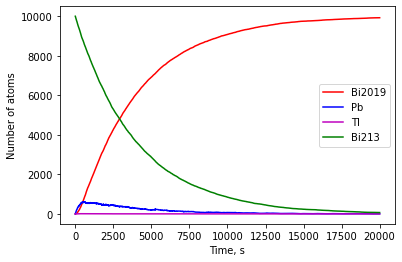

In [148]:
from random import random
from numpy import arange
from pylab import plot,xlabel,ylabel,show,text, savefig, legend

# Constants
NBi_213 = 10000
NPb = 0            
NBi_209 = 0         
NTl = 0
tau1 = 3.3*60        
tau2 = 2.2*60
tau3 = 46*60
h = 1.0               # Size of time-step in seconds
p1 = 1 - 2**(-h/tau1)   # Probability of decay in one step
p2 = 1 - 2**(-h/tau2)
p3 = 1 - 2**(-h/tau3)
tmax = 20000           # Total time in sec
time = []
tpoints = arange(0.0,tmax,h) # make time array
Pbpoints = [] # empty array to strore # of Pb atoms at each time step
Bi_209points = []
Tlpoints = []
Bi_213points = []
for t in tpoints:    # for time 0-20000 sec
    time.append(t)
    Pbpoints.append(NPb) 
    Bi_209points.append(NBi_209) 
    decay = 0
    for i in range(NPb): # determine number of atoms that decay
        if random() < p1:
            decay += 1
    NPb -= decay # subtract number of decayed Parent atoms 
    NBi_209 += decay # add number of decayed Daughter atoms 
    
    decay1 = 0 
    Tlpoints.append(NTl) 
    for j in range(NTl): 
        if random() < p2:
            decay1 += 1
    NTl -= decay1  
    NPb += decay1 
    
    decay2 = 0
    decay3 = 0
    Bi_213points.append(NBi_213)
    for k in range(NBi_213): # determine number of atoms that decay
        if random() < p3:
            if random() < 0.9791:
                decay2 += 1
            else:
                decay3 += 1
    NBi_213 -= (decay2 + decay3)
    NPb += decay2 # subtract number of decayed Parent atoms 
    NTl += decay3 # add number of decayed Daughter atoms 
    
f = open('decay.txt', 'w')
f.write("Time," + " " + "Bi213," + " " + "Bi209," + " " + "Pb,"  + " " + "Tl" + "\n")
for i in range(len(time)):
    f.write(str(time[i]) + " " + str(Bi_213points[i]) + " " + str(Bi_209points[i])  + " " + str(Pbpoints[i]) + " " + str(Tlpoints[i]) + "\n")
f.close()

# Make the graph
plot(tpoints,Bi_209points, c='r', label="Bi2019") #red
plot(tpoints,Pbpoints, c='b', label="Pb") #blue
plot(tpoints,Tlpoints, c='m', label="Tl") #magenda
plot(tpoints,Bi_213points, c='g', label="Bi213") #green
legend(loc="center right")
xlabel("Time, s")
ylabel("Number of atoms")
savefig('decay.png', dpi=300)
show()
